# **Lab 2: Classification and Hyperparameter Tuning**
---
### **Description**
This lab provides a comprehensive overview of implementing and evaluating Linear Regression, KNN, and Hyperparameter Tuning.

<br>

### **Lab Structure**
**Part 1**: [Regression with Linear Regression](#p1)

**Part 2**: [Classification with KNN](#p2)

**Part 3**: [[OPTIONAL] Hyperparameter Tuning](#p3)



<br>

### **Learning Objectives**
By the end of this lab, we will:
* Understand how to implement and evaluate Linear Regression and KNN models in sklearn.

* Recognize how to perform random and grid searches for hyperparameter tuning.


<br>


### **Resources**

* [Linear Regression with sklearn Cheat Sheet](https://docs.google.com/document/d/1iVieBynTpoKq1LA0kR-4pqDo6evoW5wvbNyE0wOGhYY/edit?usp=drive_link)

* [KNN with sklearn Cheat Sheet](https://docs.google.com/document/d/1U-AWXkJEDXZFqhBwFlDjyp9bLsVOeeXGYaxa6SZ7KpY/edit#heading=h.y8q92z25l6we)


<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import *
from sklearn import datasets
from sklearn.metrics import *

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

<a name="p1"></a>

---
## **Part 1: Regression with Linear Regression**
---

In this part, we will model the relationship between the numerical features and the `Runtime (min)` variable as the label using linear regression.

#### **Step #1: Load the data**

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS9jPkeKJ8QUuAl-fFdg3nJPDP6vx1byvIBl4yW8UZZJ9QEscyALJp1eywKeAg7aAffwdKP63D9osF1/pub?gid=169291584&single=true&output=csv"
movie_df = pd.read_csv(url)

movie_df.drop_duplicates(inplace=True)

mean_runtime = movie_df['Runtime'].mean()
movie_df['Runtime'] = movie_df['Runtime'].fillna(mean_runtime)

movie_df = movie_df.rename(columns = {"Runtime": "Runtime (min)"})
movie_df = movie_df.astype({"Runtime (min)": "int64"})

#### **Step #2: Decide independent and dependent variables**

Examining the DataFrame, choose only the numerical variables (other than `Runtime (min)`) for the features and `Runtime (min)` for the label.


In [ ]:
features = # COMPLETE THIS CODE
label = # COMPLETE THIS CODE

##### **Solution**

In [ ]:
features = movie_df[['Released_Year', 'IMDB_Rating', 'No_of_Votes', 'Gross']]
label = movie_df['Runtime (min)']

#### **Step #3: Split data into training and testing data**

Split the data using a 80 / 20 split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS CODE

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

#### **Step #4: Import your model**

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5: Initialize your model and set hyperparameters**


Linear regression takes no hyperparameters, so just initialize the model.

##### **Solution**

In [ ]:
LR = LinearRegression()

#### **Step #6: Fit your model, test on the testing data, and create a visualization if applicable**

##### **Solution**

In [ ]:
LR.fit(X_train, y_train)
pred = LR.predict(X_test)

##### **Create a visualization**

Use `y_test` and your `prediction` from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be. The code has already been given to you.
```
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")
```

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(# COMPLETE THIS CODE
plt.plot(# COMPLETE THIS CODE, '--k', label="Correct prediction")\

plt.xlabel(# COMPLETE THIS CODE
plt.ylabel(# COMPLETE THIS CODE
plt.title(# COMPLETE THIS CODE


plt.legend()

###### **Solution**

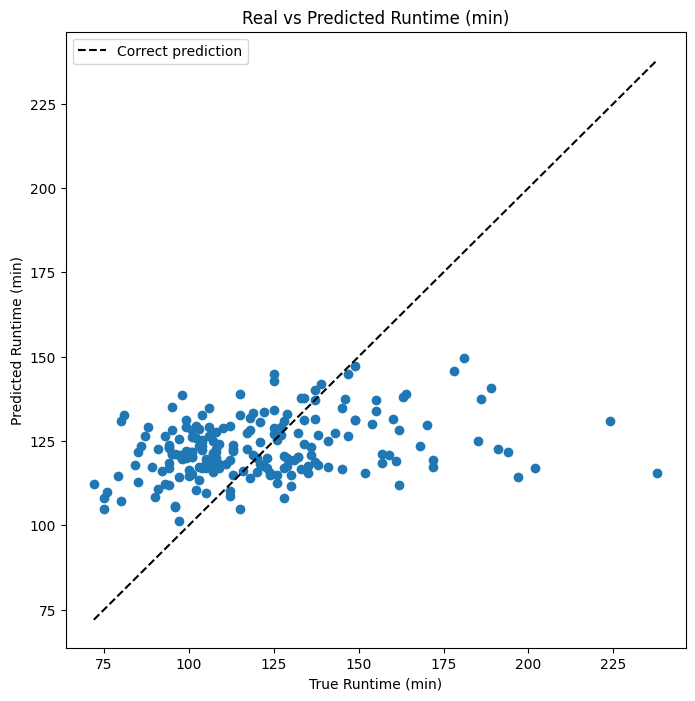

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")

plt.xlabel('True Runtime (min)')
plt.ylabel('Predicted Runtime (min)')
plt.title("Real vs Predicted Runtime (min)")

plt.legend()
plt.show()

#### **Step #7: Evaluate your model**

Use mean squared error and the R2 score as the evaluation metrics.


In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
mean_squared_error(y_test, pred)

742.503745089591

In [ ]:
r2_score(y_test, pred)

0.09461668798421152

#### **Step #8: Use the model**

Using the model we created, predict the runtime of movies based on the following `Released_Year`, `IMDB_Rating`, `No_of_Votes`, and `Gross`:

* `1999`, `7.9`, `100000`, `8000000`
* `2007`, `8.5`, `1000000`, `10000000`

In [ ]:
movie_df.describe()

,Released_Year,Runtime (min),IMDB_Rating,No_of_Votes,Gross
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03
mean,1991.221000,122.903000,7.949300,2.736929e+05,6.245165e+07
std,23.285669,28.071865,0.275491,3.273727e+05,1.051148e+08
min,1920.000000,45.000000,7.600000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,5.552625e+04,2.351568e+06
50%,1999.000000,119.000000,7.900000,1.385485e+05,1.791714e+07
75%,2009.000000,137.000000,8.100000,3.741612e+05,7.410387e+07
max,2020.000000,321.000000,9.300000,2.343110e+06,9.366622e+08


##### **Solution**

In [ ]:
# Prediction
new_movie_data = pd.DataFrame([[1999, 7.9, 100000, 8000000],[2007, 8.5, 1000000, 10000000]], columns = ['Released_Year', 'IMDB_Rating', 'No_of_Votes', 'Gross'])
movie_prediction = LR.predict(new_movie_data)
movie_prediction

# Movie 1: predicted runtime of 124...
# Movie 2: predicted runtim of 139...

array([124.417143  , 139.18909745])

<a name="p2"></a>

---
## **Part 2: Classification with KNN**
---

In this, we will implement a K-Nearest Neighbors (KNN) model aimed at predicting the diagnosis of breast cancer samples. The goal is to classify new samples as either malignant or benign based on their feature characteristics.

<br>

This dataset contains crucial information related to breast cancer, including various features such as mean radius, mean texture, and mean smoothness. The target variable (label) indicates the diagnosis, distinguishing between malignant and benign cases.

#### **Step #1: Load in Data**

**Run the code below to load the data.**

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
selected_features = ["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "mean compactness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension"]
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df[selected_features]
df['Target'] = data.target

#### **Step #2: Choose your Variables**



In [ ]:
inputs = # COMPLETE THIS CODE
output = # COMPLETE THIS CODE

##### **Solution**

In [ ]:
inputs = df.drop('Target', axis=1)
output = df['Target']

#### **Step #3: Split your Data**


In [ ]:
X_train, X_test, y_train, y_test = # COMPLETE THIS CODE

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, output, test_size = 0.2, random_state = 42)

#### **Step #4: Import an ML Algorithm**




##### **Solution**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### **Step #5: Initialize the Model**


In [ ]:
model = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
model = KNeighborsClassifier()

#### **Step #6: Fit and Test**


In [ ]:
model.fit(X_train, # COMPLETE THIS LINE

In [ ]:
predictions = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predictions = model.predict(X_test)

#### **Step #7: Evaluate**

Let's evaluate this model and put it to the test! Specifically, use the accuracy score to get a simple overall picture of your model's performance, and the confusion matrix to get a more nuanced view of where the model is performing the best and worst


In [ ]:
print(accuracy_score(# COMPLETE THIS CODE

In [ ]:
cm = confusion_matrix(# COMPLETE THIS CODE
disp = ConfusionMatrixDisplay(# COMPLETE THIS CODE
disp.plot()
plt.show()

###### **Solution**

In [ ]:
print(accuracy_score(y_test, predictions))

0.9385964912280702


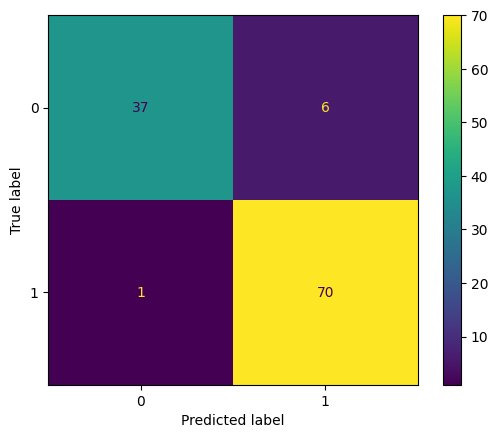

In [ ]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

#### **Step #8: Apply your Model**

You are provided with data from two new breast cancer samples, and you want to assess the predicted class labels (Malignant or Benign) for each of them. The goal is to determine whether either sample is likely to be malignant or benign based on the model's predictions.

Here is the data for the two samples:

**Sample 1:**

* Mean Radius = 12.5
* Mean Texture = 18.2
* Mean Perimeter = 80.3
* Mean Area = 490.2
* Mean Smoothness = 0.09
* Mean Compactness = 0.08
* Mean Concavity = 0.05
* Mean Concave Points = 0.03
* Mean Symmetry = 0.18
* Mean Fractal Dimension = 0.06

**Sample 2:**

* Mean Radius = 14.3
* Mean Texture = 20.8
* Mean Perimeter = 92.6
* Mean Area = 650.9
* Mean Smoothness = 0.1
* Mean Compactness = 0.12
* Mean Concavity = 0.09
* Mean Concave Points = 0.05
* Mean Symmetry = 0.2
* Mean Fractal Dimension = 0.07

You will use your KNN (k-nearest neighbors) model to predict the class labels for these samples and assess their relative likelihood of being malignant or benign based on the predictions.

##### **1. Predict the diagnosis of Sample 1**


In [ ]:
sample_1_features = pd.DataFrame([[# COMPLETE THIS CODE

prediction_sample_1 = model.predict(# COMPLETE THIS CODE

print("Predicted label for Sample 1:", "Malignant" if prediction_sample_1[0] == 1 else "Benign")

###### **Solution**

In [ ]:
sample_1_features = pd.DataFrame([[12.5, 18.2, 80.3, 490.2, 0.09, 0.08, 0.05, 0.03, 0.18, 0.06]], columns=X_train.columns)

prediction_sample_1 = model.predict(sample_1_features)

print("Predicted label for Sample 1:", "Malignant" if prediction_sample_1[0] == 1 else "Benign")

Predicted label for Sample 1: Malignant


##### **2. Predict the diagnosis of Sample 2**

In [ ]:
sample_2_features = pd.DataFrame([[# COMPLETE THIS CODE

prediction_sample_2 = model.predict(# COMPLETE THIS CODE

print("Predicted label for Sample 2:", "Malignant" if prediction_sample_1[0] == 1 else "Benign")

###### **Solution**

In [ ]:
sample_2_features = pd.DataFrame([[14.3, 20.8, 92.6, 650.9, 0.1, 0.12, 0.09, 0.05, 0.2, 0.07]], columns=X_train.columns)

prediction_sample_2 = model.predict(sample_2_features)

print("Predicted label for Sample 2:", "Malignant" if prediction_sample_2[0] == 1 else "Benign")

Predicted label for Sample 2: Malignant


<a name="p3"></a>

---
## **[OPTIONAL] Part 3: Hyperparameter Tuning**
---

In this section, we will explore how to implement random search and grid search for hyperparameter tuning KNN models. Some key points about these approaches:

<br>

1. **Random Search**

This randomly samples hyperparameter combinations from predefined ranges. It's straightforward to implement and can efficiently explore the hyperparameter space without exhaustively searching all possible combinations.

It is commonly used in deep learning due to its simplicity and ability to handle large search spaces efficiently. This is particularly important since deep learning models often have many hyperparameters.


<br>

2. **Grid Search**

This exhaustively searches all possible combinations of hyperparameters within predefined ranges. While it's easy to understand and implement, it can be computationally expensive, especially for high-dimensional hyperparameter spaces.

This is not commonly used in general due to its inefficiency, unless you have an idea of what range to look at. However, it's valuable to understand a basic way to approach a more structure search than a random one. And in some cases where there are not too many hyperparameters or too wide a range to search, it may actually be useful.


<br>

**Run the cell below to load and split the data.**

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
selected_features = ["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "mean compactness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension"]
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df[selected_features]
df['Target'] = data.target

inputs = df.drop('Target', axis=1)
output = df['Target']

X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, output, test_size = 0.2, random_state = 42)

<a name="p3.1"></a>

---
### **Part 3.1: Random Search**
---

In this section, we will see two different ways to run a random search over hyperparameter values. They all accomplish the exact same thing and there is no reason to believe that one will produce better models in the end. However, each approach does have its pros/cons in terms of ease of use, efficiency, etc.

<br>

**NOTE**: We are using relatively conventional hyperparameter values to search within as follows:
* Using `10**np.random.uniform(-4, -2)` generates learning rates in the range $[0.0001, 0.01]$.
* This range is chosen because it covers small to moderately large learning rates, which are commonly effective for training neural networks.
* The exponential scale ensures that we can effectively explore a wide range of learning rates in our random search.

#### **Problem #3.1.1**

Purely for the sake of example, here is how we can perform a random search manually.



<br>

**NOTES**:
* Simplicity: Straightforward to implement; you manually define a loop to try different hyperparameter combinations.
* Flexibility: High flexibility since you control the entire process, but it requires more code.
* Visualization: Manual collection and plotting of results, giving you full control over how to visualize the performance.
* Real-world Usage: Less common in large-scale applications due to the manual effort required.

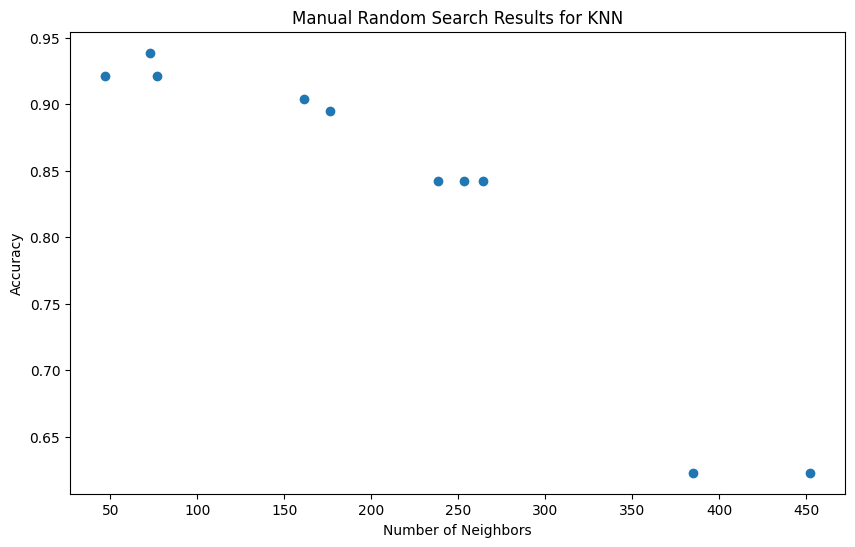

In [ ]:
max_points = len(X_train)


results = []
for _ in range(10):  # Number of random samples
    n_neighbors = np.random.randint(1, max_points)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    results.append({'n_neighbors': n_neighbors, 'accuracy': accuracy})

# Convert results to a DataFrame
df_results_knn_manual = pd.DataFrame(results)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(df_results_knn_manual['n_neighbors'], df_results_knn_manual['accuracy'], cmap='viridis')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Manual Random Search Results for KNN')
plt.show()

#### **Problem #3.1.2**

Here, we use `RandomizedSearchCV` from `sklearn` that performs a random search using cross validation.

<br>

**NOTES**:
* Simplicity: More concise and automated than manual search. It leverages RandomizedSearchCV from sklearn for hyperparameter tuning.
* Flexibility: Allows you to define a range of hyperparameters to sample from. Automated cross-validation is built-in.
* Visualization: Automated collection of results, making it easy to analyze and visualize performance metrics.
* Real-world Usage: Widely used in practice for its automation and integration with scikit-learn's ecosystem.

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....................................n_neighbors=116; total time=   0.0s
[CV] END ....................................n_neighbors=116; total time=   0.0s
[CV] END ....................................n_neighbors=116; total time=   0.0s
[CV] END .....................................n_neighbors=90; total time=   0.0s
[CV] END .....................................n_neighbors=90; total time=   0.0s
[CV] END .....................................n_neighbors=90; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END ....................................n_neighbors=307; total time=   0.0s
[CV] END ....................................n_neighbors=307; total time=   0.0s
[CV] END ....................................n_n

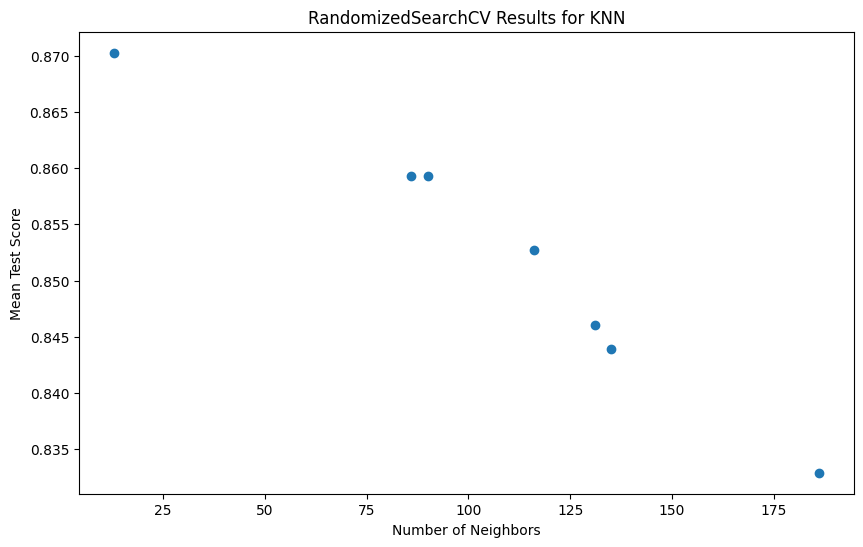

In [ ]:
max_points = len(X_train)

# Define the model
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_neighbors': np.arange(1, max_points)
}

# Use RandomizedSearchCV
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=3, verbose=2)
random_search_knn_result = random_search_knn.fit(X_train, y_train)

# Convert results to DataFrame
df_results_knn_cv = pd.DataFrame(random_search_knn_result.cv_results_)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(df_results_knn_cv['param_n_neighbors'], df_results_knn_cv['mean_test_score'], cmap='viridis')

plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.title('RandomizedSearchCV Results for KNN')
plt.show()

#### **Problem #3.1.3**

Now, modify the code from above to test 20 random values of K instead of 10.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ....................................n_neighbors=378; total time=   0.0s
[CV] END ....................................n_neighbors=378; total time=   0.0s
[CV] END ....................................n_neighbors=378; total time=   0.0s
[CV] END ....................................n_neighbors=282; total time=   0.0s
[CV] END ....................................n_neighbors=282; total time=   0.0s
[CV] END ....................................n_neighbors=282; total time=   0.0s
[CV] END .....................................n_neighbors=28; total time=   0.0s
[CV] END .....................................n_neighbors=28; total time=   0.0s
[CV] END .....................................n_neighbors=28; total time=   0.0s
[CV] END ....................................n_neighbors=441; total time=   0.0s
[CV] END ....................................n_neighbors=441; total time=   0.0s
[CV] END ....................................n_n

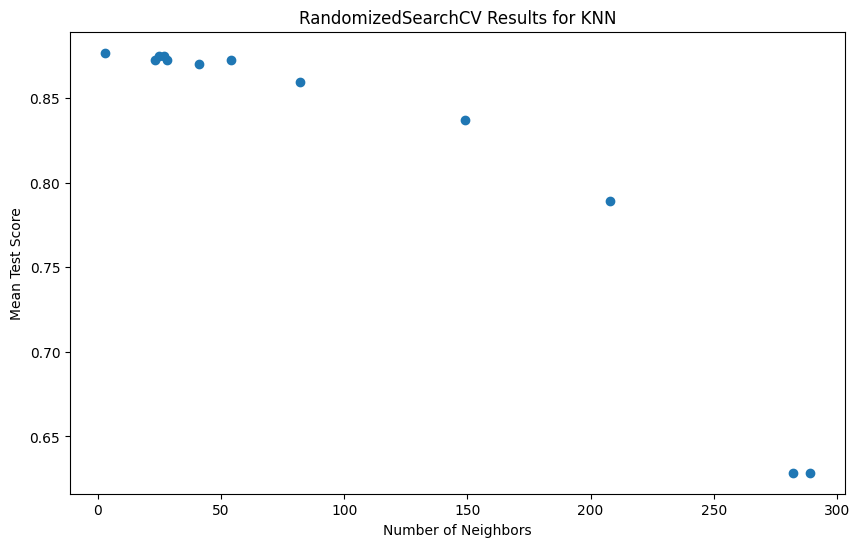

In [ ]:
max_points = len(X_train)

# Define the model
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_neighbors': np.arange(1, max_points)
}

# Use RandomizedSearchCV
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=20, cv=3, verbose=2)
random_search_knn_result = random_search_knn.fit(X_train, y_train)

# Convert results to DataFrame
df_results_knn_cv = pd.DataFrame(random_search_knn_result.cv_results_)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(df_results_knn_cv['param_n_neighbors'], df_results_knn_cv['mean_test_score'], cmap='viridis')

plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.title('RandomizedSearchCV Results for KNN')
plt.show()

#### **Problem #3.1.4**

Next, modify the code from above (with 20 K values) but only for *odd* K values to avoid ties.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ....................................n_neighbors=263; total time=   0.1s
[CV] END ....................................n_neighbors=263; total time=   0.0s
[CV] END ....................................n_neighbors=263; total time=   0.0s
[CV] END ....................................n_neighbors=107; total time=   0.0s
[CV] END ....................................n_neighbors=107; total time=   0.0s
[CV] END ....................................n_neighbors=107; total time=   0.0s
[CV] END ....................................n_neighbors=435; total time=   0.0s
[CV] END ....................................n_neighbors=435; total time=   0.0s
[CV] END ....................................n_neighbors=435; total time=   0.0s
[CV] END ....................................n_neighbors=117; total time=   0.0s
[CV] END ....................................n_neighbors=117; total time=   0.0s
[CV] END ....................................n_n

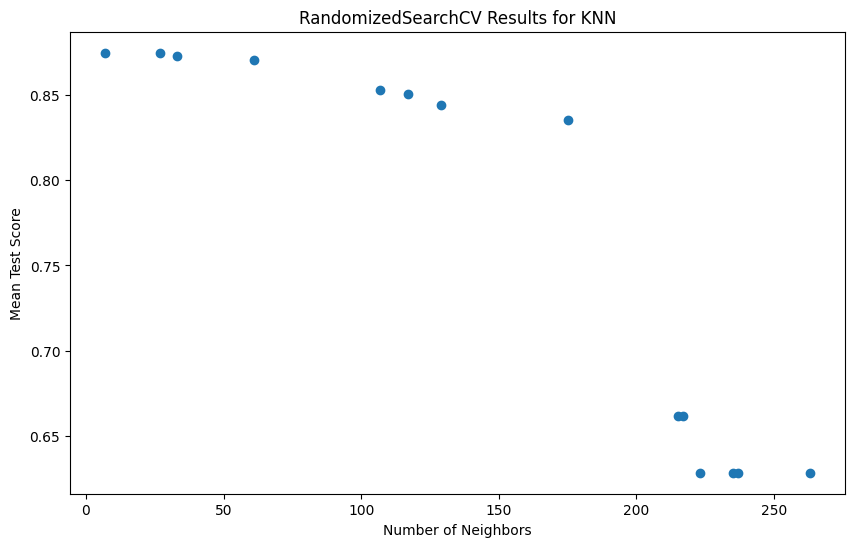

In [ ]:
max_points = len(X_train)

# Define the model
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_neighbors': np.arange(1, max_points, 2)
}

# Use RandomizedSearchCV
random_search_knn = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=20, cv=3, verbose=2)
random_search_knn_result = random_search_knn.fit(X_train, y_train)

# Convert results to DataFrame
df_results_knn_cv = pd.DataFrame(random_search_knn_result.cv_results_)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(df_results_knn_cv['param_n_neighbors'], df_results_knn_cv['mean_test_score'], cmap='viridis')

plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.title('RandomizedSearchCV Results for KNN')
plt.show()

#### **Problem #3.1.5**

Now, train a single KNN model with the best K value seen in the last problem and look at its confusion matrix on the test set.

<br>

**NOTE**: There are several ways to do this, but one of the easiest is to use the `.best_params_` attribute of the `RandomizedSearchCV` object after fitting.

In [ ]:
k_value = random_search_knn_result.best_params_['n_neighbors']

print(k_value)

In [ ]:
model = # COMPLETE THIS CODE
model.# COMPLETE THIS CODE

predictions = # COMPLETE THIS CODE

cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

##### **Solution**

In [ ]:
k_value = random_search_knn_result.best_params_['n_neighbors']

print(k_value)

3


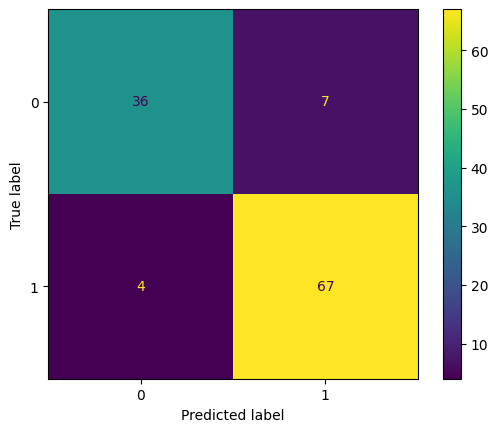

In [ ]:
model = KNeighborsClassifier(n_neighbors=k_value)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

<a name="p3.2"></a>

---
### **Part 3.2: Grid Search**
---

In this section, we will see several different ways to run a grid search over hyperparameter values. They all accomplish the exact same thing and there is no reason to believe that one will produce better models in the end. However, each approach does have its pros/cons in terms of ease of use, efficiency, etc.

#### **Problem #3.2.1**

Purely for the sake of example, here is how we can perform a grid search manually.



<br>

**NOTES**:
* Simplicity: Straightforward to implement; you manually define a loop to try different hyperparameter combinations.
* Flexibility: High flexibility since you control the entire process, but it requires more code.
* Visualization: Manual collection and plotting of results, giving you full control over how to visualize the performance.
* Real-world Usage: Less common in large-scale applications due to the manual effort required.

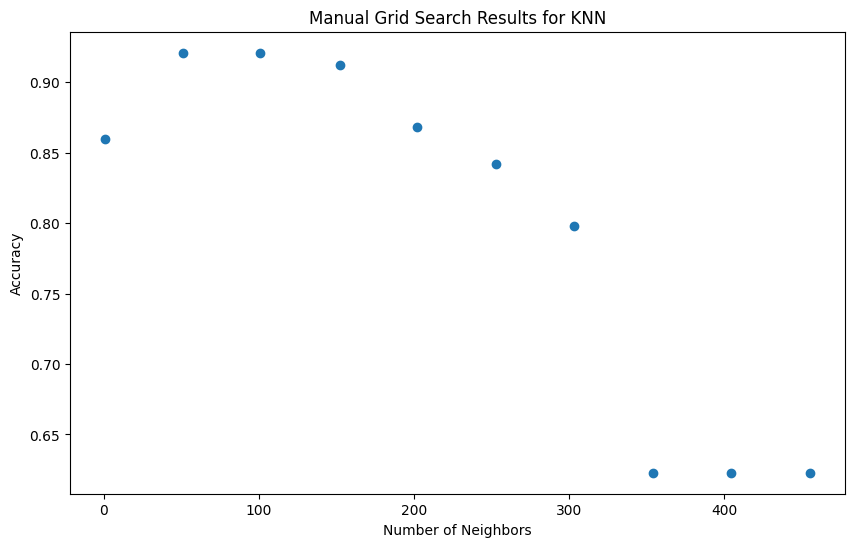

In [ ]:
max_points = len(X_train)


# Grid Search
results = []
k_grid = np.linspace(1, max_points, num=10)

for i in range(10):
    n_neighbors = int(k_grid[i])
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    results.append({'n_neighbors': n_neighbors, 'accuracy': accuracy})

# Convert results to a DataFrame
df_results_knn_manual = pd.DataFrame(results)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(df_results_knn_manual['n_neighbors'], df_results_knn_manual['accuracy'])

plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Manual Grid Search Results for KNN')
plt.show()

#### **Problem #3.2.2**

Here, we use `GridSearchCV` from `sklearn` that performs a grid search using cross validation. In order to use `sklearn` methods with neural networks built in `keras`, we must install and use a "wrapper" such as `KerasClassifer` first.

<br>

**NOTES**:
* Simplicity: More concise and automated than manual search. It leverages GridSearchCV from sklearn for hyperparameter tuning.
* Flexibility: Allows you to define a range of hyperparameters to sample from. Automated cross-validation is built-in.
* Visualization: Automated collection of results, making it easy to analyze and visualize performance metrics.
* Real-world Usage: Widely used in practice for its automation and integration with scikit-learn's ecosystem.

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END .....................................n_neighbors=51; total time=   0.0s
[CV] END .....................................n_neighbors=51; total time=   0.0s
[CV] END .....................................n_neighbors=51; total time=   0.0s
[CV] END ....................................n_neighbors=101; total time=   0.0s
[CV] END ....................................n_neighbors=101; total time=   0.0s
[CV] END ....................................n_neighbors=101; total time=   0.1s
[CV] END ....................................n_neighbors=151; total time=   0.1s
[CV] END ....................................n_neighbors=151; total time=   0.1s
[CV] END ....................................n_n

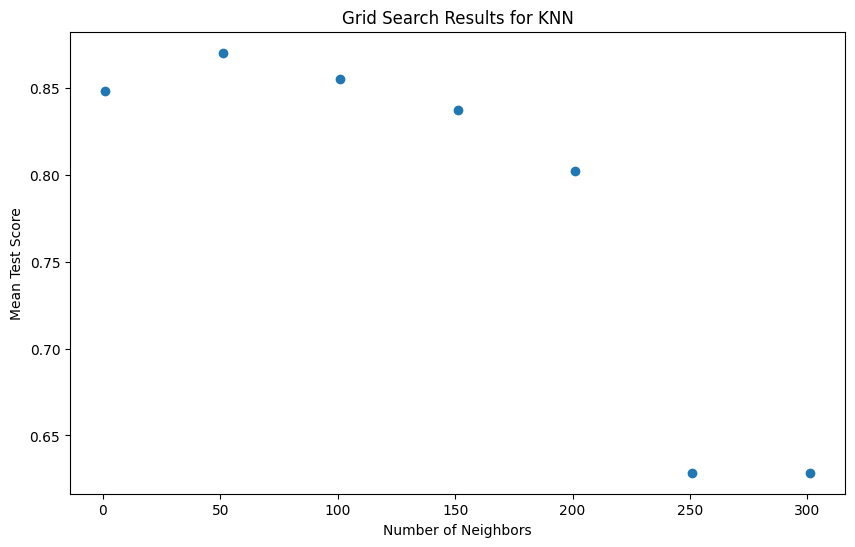

In [ ]:
max_points = len(X_train)

# Define the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid_knn = {
    'n_neighbors': np.arange(1, max_points, 50),
}

# Use GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=3, verbose=2)
grid_search_knn_result = grid_search_knn.fit(X_train, y_train)

# Convert results to DataFrame
df_results_knn_grid = pd.DataFrame(grid_search_knn_result.cv_results_)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(df_results_knn_grid['param_n_neighbors'], df_results_knn_grid['mean_test_score'])

plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results for KNN')
plt.show()

#### **Problem #3.2.3**

Now, alter this so that the grid of K values is in steps of 10 instead of 50. This is a finer grid, which takes longer to search but is more exhuastive.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

Fitting 3 folds for each of 46 candidates, totalling 138 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END .....................................n_neighbors=11; total time=   0.0s
[CV] END .....................................n_neighbors=11; total time=   0.0s
[CV] END .....................................n_neighbors=11; total time=   0.0s
[CV] END .....................................n_neighbors=21; total time=   0.0s
[CV] END .....................................n_neighbors=21; total time=   0.0s
[CV] END .....................................n_neighbors=21; total time=   0.0s
[CV] END .....................................n_neighbors=31; total time=   0.0s
[CV] END .....................................n_neighbors=31; total time=   0.0s
[CV] END .....................................n

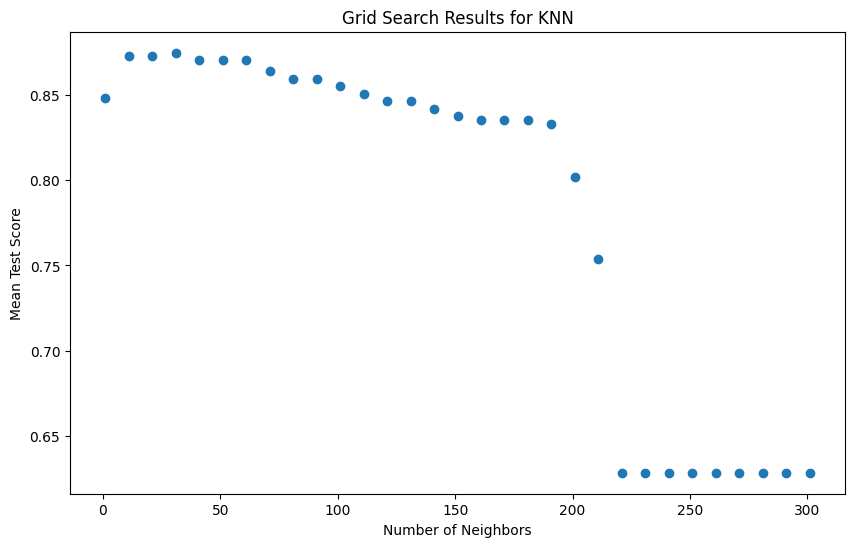

In [ ]:
max_points = len(X_train)

# Define the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid_knn = {
    'n_neighbors': np.arange(1, max_points, 10),
}

# Use GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=3, verbose=2)
grid_search_knn_result = grid_search_knn.fit(X_train, y_train)

# Convert results to DataFrame
df_results_knn_grid = pd.DataFrame(grid_search_knn_result.cv_results_)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(df_results_knn_grid['param_n_neighbors'], df_results_knn_grid['mean_test_score'])

plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results for KNN')
plt.show()

#### **Problem #3.2.4**

From the problem above, determine the range of 50 K values that seem to have the highest performance (you can do this by eye or by inspecting the resulting scores themselves). Then, in the space below perform a grid search on every single one of these 50 values.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=11; total time=   0.0s
[CV] END .....................................n_neighbors=11; total time=   0.0s
[CV] END .....................................n_neighbors=11; total time=   0.0s
[CV] END .....................................n_neighbors=12; total time=   0.0s
[CV] END .....................................n_neighbors=12; total time=   0.0s
[CV] END .....................................n_neighbors=12; total time=   0.0s
[CV] END .....................................n_neighbors=13; total time=   0.0s
[CV] END .....................................n_neighbors=13; total time=   0.0s
[CV] END .....................................n

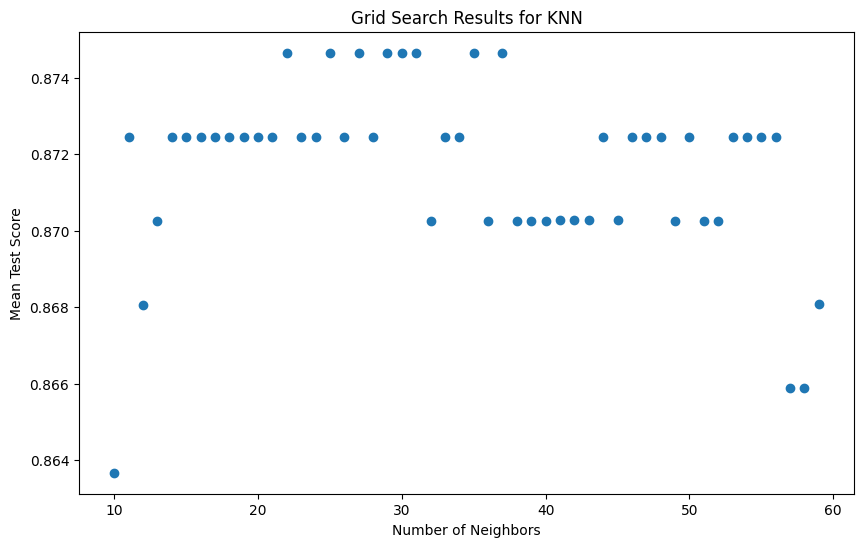

In [ ]:
# Define the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid_knn = {
    'n_neighbors': np.arange(10, 60),
}

# Use GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=3, verbose=2)
grid_search_knn_result = grid_search_knn.fit(X_train, y_train)

# Convert results to DataFrame
df_results_knn_grid = pd.DataFrame(grid_search_knn_result.cv_results_)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(df_results_knn_grid['param_n_neighbors'], df_results_knn_grid['mean_test_score'])

plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results for KNN')
plt.show()

#### **Problem #3.2.5**

Now, train a KNN model with the best K value from the problem above and look at its confusion matrix.

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
k_value = grid_search_knn_result.best_params_['n_neighbors']

print(k_value)

22


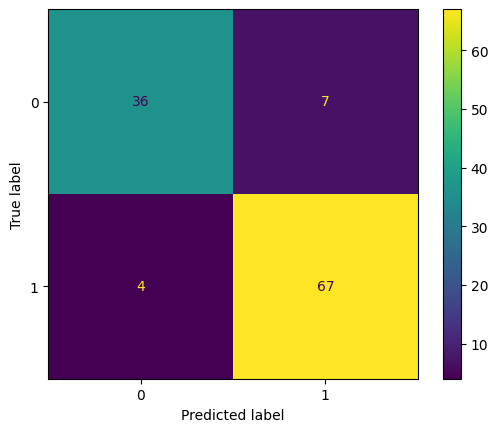

In [ ]:
model = KNeighborsClassifier(n_neighbors=k_value)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

---

# End of Notebook

© 2024 The Coding School, All rights reserved